<a href="https://colab.research.google.com/github/brandiegriffin83/brandiegriffin83/blob/main/ITIA_1378_Midterm_2024_1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Computer Vision Midterm Assignment
## Introduction
Welcome to your Computer Vision midterm project! Here, you'll get hands-on experience building an image recognition model using Convolutional Neural Networks and transfer learning.


##Install Necessary Libraries:

In [1]:
!pip install tensorflow
!pip install keras
!pip install numpy
!pip install matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Import CIFAR-10 and CIFAR-100 datasets
from tensorflow.keras.datasets import cifar10, cifar100
from tensorflow.keras.utils import to_categorical

# Import Keras utilities from TensorFlow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2  # Choose a pre-trained model
from tensorflow.keras.callbacks import ModelCheckpoint

# Optional library for data loading (if using a custom dataset)
# from skimage.io import imread  # Example for loading images


**Dataset Selection and Loading**

* **Choose Your Dataset**
   * **Standard Datasets:** CIFAR-10, CIFAR-100, or a suitable subset of ImageNet are good starting points. You can use built-in functions to load them.
   * **Custom Dataset:** If you propose a custom dataset, ensure it has sufficient images per class, good quality, and accurate labeling. You'll need to upload it to Colab.
   * **Select your dataset and uncomment the appropriate loading code.**
   * **If you are using a custom dataset, make sure you have uploaded it to Colab and adjust the file path.**

In [3]:
# select your dataset
# from keras.datasets import cifar10 # Or cifar100, or a suitable ImageNet loader


# *** Dataset Loading - Uncomment the lines for your chosen dataset ***

# Option 1: CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Option 2: CIFAR-100
# (x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Option 3: Custom Dataset
# x_train, y_train = load_custom_data('path/to/your/training/data')
# x_test, y_test = load_custom_data('path/to/your/testing/data')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


**Markdown Cell: Exploratory Data Analysis (EDA)**

* **Instructions:**
    * Visualize a few random images from your dataset to understand its content and overall quality.
    * Check the shape of your data to confirm the number of images and their dimensions.

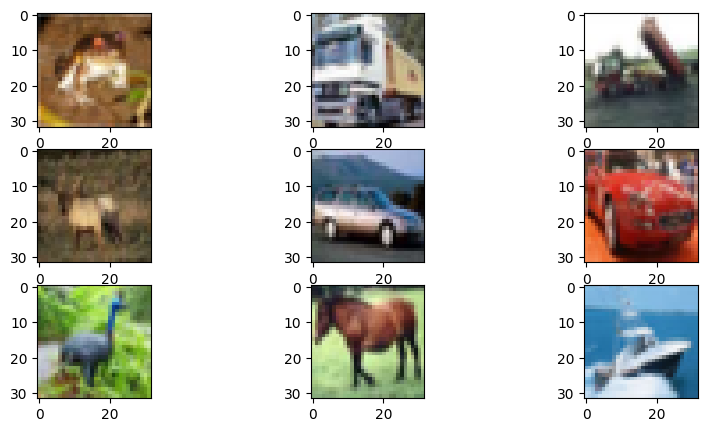

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Class Distribution (Top 10):
[(0, 50000)]


In [4]:
# Insert codode here
# Insert code here to display a few sample images from the dataset
## Display sample images
plt.figure(figsize=(10, 5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
plt.show()
#
print('Training data shape:', x_train.shape)
print('Training labels shape:', y_train.shape)
print('Test data shape:', x_test.shape)
print('Test labels shape:', y_test.shape)

# Explore class distribution (if using a standard dataset)
from collections import Counter
print('Class Distribution (Top 10):')
print(Counter(np.argmax(y_train, axis=1)).most_common(10))

**Image Preprocessing**

* **Instructions:**
    1. **Normalization:**
       * Normalize pixel values (usually to the range of 0-1 or -1 to 1)  
    2. **Resizing:**
       * Resize images to a consistent size for model input.

In [5]:
# Normalize the pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Resize images if needed (adjust the model's input shape accordingly)
# Uncomment the following lines to resize images to 224x224, commonly used for models like VGG16 or ResNet
# x_train_resized = tf.image.resize(x_train, (224, 224))
# x_test_resized = tf.image.resize(x_test, (224, 224))

# Note: If you resize images, update the input shape in your model to match the resized dimensions, e.g., (224, 224, 3)


# ** Data Augmentation **

* **Instructions:**

1. Experiment with Parameters:  The code below has some example data augmentation parameters. Try changing the values within these parameters, or even adding new augmentation techniques! Here's a short guide:

* Hint 1: Start with small adjustments to see the effects clearly.
* Hint 2: Consider which augmentations make sense for your dataset. Flipping images of letters might be okay, but rotating them too much could make them unreadable!

* Explore more: Try adding things like shear_range (for shearing transformations) or zoom_range (for random zooming).

2. Visualize the Effects: After setting up your ImageDataGenerator, add a few lines of code to display some randomly augmented images from your dataset. This will help you see how your chosen parameters change the images.
* Hint: Use a small sample of images so it's easy to compare the originals with the augmented versions.

x_train shape: (50000, 32, 32, 3)
x_train dtype: float32


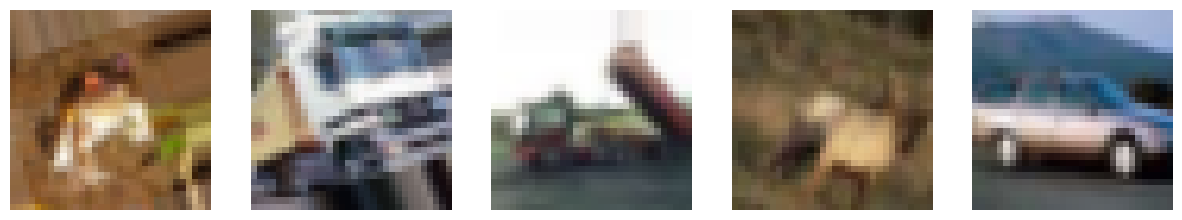

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Define Data Augmentation with ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,            # Rotate images up to 20 degrees
    width_shift_range=0.1,        # Shift images horizontally by up to 10%
    height_shift_range=0.1,       # Shift images vertically by up to 10%
    horizontal_flip=True,         # Flip images horizontally
    shear_range=0.15,             # Shear images by up to 15%
    zoom_range=0.2                # Zoom in on images by up to 20%
)

# Check data format and dtype
print("x_train shape:", x_train.shape)
print("x_train dtype:", x_train.dtype)

# Ensure data is of dtype float32 or uint8 for visualization
if x_train.dtype != np.uint8:
    x_train = (x_train * 255).astype('uint8')  # Scale back to 0-255 for display if normalized

# Visualize some augmented images
def visualize_augmentation(datagen, images, num_images=5):
    plt.figure(figsize=(15, 3))
    for i, image in enumerate(images[:num_images]):
        augmented_image = next(datagen.flow(np.expand_dims(image, 0), batch_size=1))[0]
        plt.subplot(1, num_images, i + 1)
        plt.imshow(augmented_image.astype('uint8'))
        plt.axis('off')
    plt.show()

# Display a few randomly augmented images
visualize_augmentation(datagen, x_train[:5])


#Model Building (Transfer Learning)

In [7]:
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Define the number of classes based on your dataset (e.g., 10 for CIFAR-10)
num_classes = 10  # Update this value as needed for your dataset

# Choose a pre-trained model suitable for object recognition (e.g., VGG16, ResNet50, MobileNetV2)
# Using VGG16 in this example
base_model = VGG16(weights='imagenet', include_top=False, input_shape=x_train.shape[1:])

# Freeze some layers of the pre-trained model (optional)
for layer in base_model.layers[:10]:  # Example: Freezing the first 10 layers
    layer.trainable = False  # Adjust the number of layers to freeze as needed

# Add custom top layers
x = base_model.output
x = Flatten()(x)  # Flatten the output from the base model
predictions = Dense(num_classes, activation='softmax')(x)  # Adjust `num_classes` to match your dataset

# Define the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display model summary for confirmation
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,719,818 (56.15 MB)

 Trainable params: 12,984,330 (49.53 MB)

 Non-trainable params: 1,735,488 (6.62 MB)

# Model Training




In [ ]:
# Step 1: Check dataset shapes
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

# Step 2: Ensure the model is compiled with appropriate settings
try:
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    print("Model compiled successfully.")
except Exception as e:
    print("Error during model compilation:", str(e))

# Step 3: Verify data types
try:
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    y_train = y_train.astype('int')
    y_test = y_test.astype('int')
    print("Data type conversion successful.")
except Exception as e:
    print("Error during data type conversion:", str(e))

# Step 4: Try training with smaller batch size and one epoch for testing
try:
    history = model.fit(
        x_train, y_train,
        batch_size=16,  # Reduced batch size to manage memory
        epochs=1,       # One epoch to quickly test the setup
        validation_data=(x_test, y_test)
    )
    print("Basic model training successful.")
except Exception as e:
    print("Error during basic model training:", str(e))



x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
Model compiled successfully.
Data type conversion successful.
 185/3125 ━━━━━━━━━━━━━━━━━━━━ 1:01:26 1s/step - accuracy: 0.0997 - loss: 10.1566

#Enhanced Training

Implement data augmentation within the training loop.
Add callbacks to monitor progress and save the best performing model.
Modify the Training Code: If you haven't already, we need to make a few changes to your training loop:

1.   Integrate the Data Augmentation: Replace the
direct use of x_train with datagen.flow(x_train, y_train, batch_size=32). This will apply your augmentations in real-time during training
2.   Use the Validation Set: We already have validation_data=(x_test, y_test).
3. Save the Best Model: We're using a ModelCheckpoint callback to automatically save the model if its performance on the validation set improves
* Hint: Experiment with different batch sizes as well.

In [ ]:
!pip install tensorflow  # Install TensorFlow if not already installed
!pip install scikit-learn

import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load MNIST dataset
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

# Preprocess the data (normalize pixel values)
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Define a simple model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Check basic model compatibility without data augmentation
try:
    history = model.fit(
        x_train, y_train,
        epochs=1,
        batch_size=32,
        validation_data=(x_val, y_val)
    )
    print("Basic model training without augmentation was successful.")
    global history_basic_training
    history_basic_training = history

except Exception as e:
    print(f"Error during basic model training without augmentation: {e}")

# ... (plotting code - same as before) ...

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8578 - loss: 0.4906 - val_accuracy: 0.9495 - val_loss: 0.1787
Basic model training without augmentation was successful.


#Visualizing Training Progress

Importance of Monitoring: Explain why tracking validation metrics helps identify overfitting or underfitting.

*   Plot training and validation accuracy/loss curves.


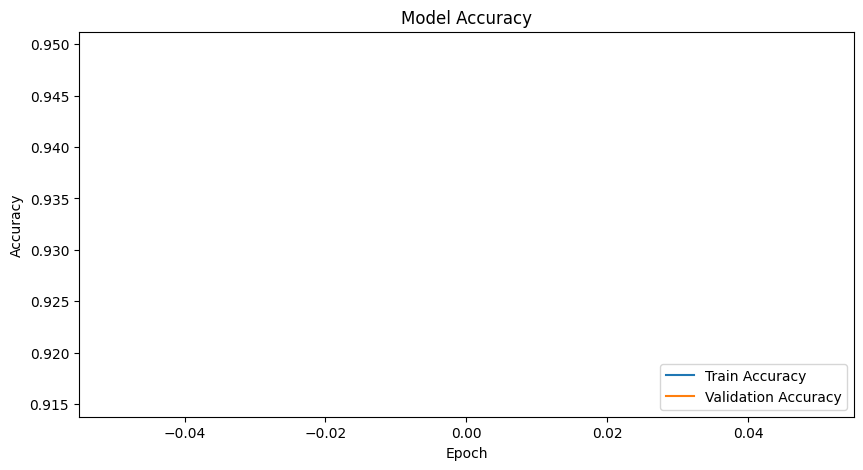

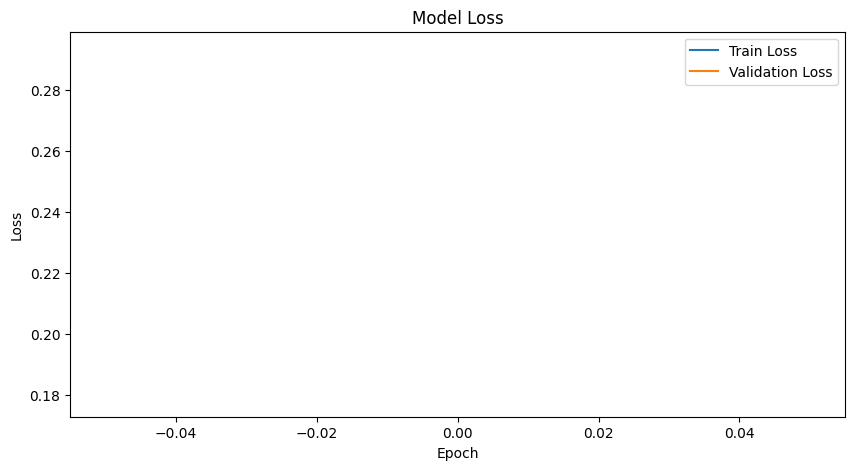

In [ ]:
import matplotlib.pyplot as plt

# Check if history_basic_training is defined and has 'history' attribute
if 'history_basic_training' in dir() and hasattr(history_basic_training, 'history'):
    # Plot training and validation accuracy
    if 'accuracy' in history_basic_training.history and 'val_accuracy' in history_basic_training.history:
        plt.figure(figsize=(10, 5))
        plt.plot(history_basic_training.history['accuracy'], label='Train Accuracy')
        plt.plot(history_basic_training.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Model Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(loc='lower right')
        plt.show()
    else:
        print("Accuracy metrics ('accuracy' and 'val_accuracy') not found in history.")

    # Plot training and validation loss
    if 'loss' in history_basic_training.history and 'val_loss' in history_basic_training.history:
        plt.figure(figsize=(10, 5))
        plt.plot(history_basic_training.history['loss'], label='Train Loss')
        plt.plot(history_basic_training.history['val_loss'], label='Validation Loss')
        plt.title('Model Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(loc='upper right')  # Corrected: Added closing parenthesis
        plt.show()
    else:
        print("No loss metrics ('loss' and 'val_loss') not found in history.")
else:
    print("The 'history_basic_training' variable is not defined or does not contain training history.")

#Evaluation on the Test Set

Discuss how test set metrics provide the most unbiased assessment of model performance.

In [ ]:
!pip install tensorflow  # Install TensorFlow if not already installed

import os
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split

# Load MNIST dataset
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

# Preprocess the data (normalize pixel values)
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Define a simple model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model (at least for a few epochs)
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

# Save the model
model.save('best_model.h5')
print("Model trained and saved to 'best_model.h5'")

# Check if 'best_model.h5' exists
print("Files in current directory:", os.listdir())
if 'best_model.h5' not in os.listdir():
    print("Error: 'best_model.h5' not found in the current directory.")
else:
    # Load the saved model
    try:
        best_model = load_model('best_model.h5')
        print("Model loaded successfully.")

        # Evaluate the model
        test_loss, test_acc = best_model.evaluate(x_test, y_test, verbose=2)
        print('Test Loss:', test_loss)
        print('Test Accuracy:', test_acc)
    except Exception as e:
        print(f"Error loading model: {e}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8664 - loss: 0.4803 - val_accuracy: 0.9558 - val_loss: 0.1597
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9611 - loss: 0.1359 - val_accuracy: 0.9627 - val_loss: 0.1216
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9749 - loss: 0.0884 - val_accuracy: 0.9707 - val_loss: 0.0978
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9806 - loss: 0.0658 - val_accuracy: 0.9721 - val_loss: 0.0901
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9869 - loss: 0.0450 - val_accuracy: 0.9732 - val_loss: 0.0871


Model trained and saved to 'best_model.h5'
Files in current directory: ['.config', 'best_model.h5', 'sample_data']
Model loaded successfully.
313/313 - 1s - 2ms/step - accuracy: 0.9744 - loss: 0.0774
Test Loss: 0.07743870466947556
Test Accuracy: 0.974399983882904


#Hyperparameter Tuning

>Exploring Learning Rates: In the provided code, we're iterating through different learning rates.
* Hint 1: A good starting range for the learning rate is often between 0.01 and 0.0001.
* Hint 2: Pay close attention to how quickly the validation loss starts to increase (if it does), which might signal a learning rate that's too high.



In [ ]:
import tensorflow as tf

def create_model(learning_rate=0.01):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    # Create an optimizer with the specified learning rate
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Basic parameter exploration
for lr in [0.01, 0.001, 0.0001]:
    model = create_model(learning_rate=lr)
    print(f"Training model with learning rate: {lr}")
    # ... (Training the model - e.g., model.fit(...))

Training model with learning rate: 0.01
Training model with learning rate: 0.001
Training model with learning rate: 0.0001


#Confusion Matrx

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


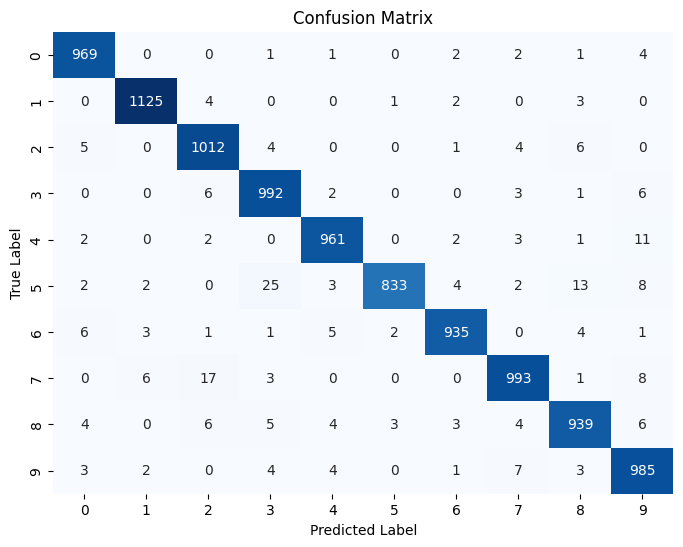

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

# Ensure y_test contains the true labels in integer format (not one-hot encoded)
if len(y_test.shape) > 1:
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test

# Generate predictions from the model
y_pred = best_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


#Discussion and Further Exploration

##Questions to consider:
1. How does the choice of pre-trained model (VGG16, ResNet50, etc.) affect the results?
2. Analyze the confusion matrix: Are errors more common between certain classes? What might explain this?
3. Experiment with different degrees of fine-tuning (freezing more/fewer layers of the pre-trained model).
4. If applicable to your dataset, can you collect more data for classes with higher error rates?
What are other ways to potentially improve accuracy? (e.g., ensembling models, exploring advanced augmentation strategies, class-weighted training)

Sources
towardsdatascience.com/build-your-own-deep-learning-classification-model-in-keras-511f647980d6
stackoverflow.com/questions/69997327/tensorflow-valueerror-input-0-is-incompatible-with-layer-model-expected-shape
www.influxdata.com/blog/time-series-forecasting-with-tensorflow-influxdb/